### Data Collection and Preprocessing:

- Collected and combined race record, racehorse, jockey, and assistant teacher data from the public portal since 2014.
  - Merged using functions like concat and merge, resulting in 90 columns of race history data.
  - Total racehorses in the past decade: 244,997.

- Removed post-data like records by section and non-predictive race records.
- Filtered out string data that can't be used for training, such as names.
- Created dummy columns for gender (male, female, gelding) and weather (clear, cloudy, rainy).
- Converted 'track' column (e.g., "dry (2%)") to a humidity value.
- Processed 'rank' column to digitize competition grades and remove non-denominating rows.
- Updated 'wgHr' column representing racehorse weight to separate current and changing weight.
- Adjusted columns for total first, second, and third places based on the total number of games played.
  - Ensured ratio consistency as the number of participants varies.

- Retained records from years 1 and 2, preserving third place records and participant counts.
  - Acknowledged the importance of previous records.

### Model Configuration:

- For predicting horse racing rankings, we considered two approaches: regression analysis using racehorse speed and classifying rankings based on the last race.
- In classification models, training all race records together might lead to errors, like classifying all horses that won first place in the last race as first place when they compete.
- To avoid this, we organized data by race, trained a decision tree model for each race, and used multiple models to predict rankings. The final 1st place was determined by voting among the horses with the most predictions.

- Racehorses are divided into six grades based on their performance, and races occur within each grade.
- To address issues of predicting lower grades, we created separate models for each grade.
- Selected races with 8 to 12 competitors, totaling 18,825 games across all grades.

- Number of models for voting:
  - Based on the typical career span of racehorses (2-3 years), we set the number of races in a year for each grade as the models participating in voting.
    - Grade 1: 250 models
    - Grade 2: 150 models
    - Grade 3: 250 models
    - Grade 4: 450 models
    - Grade 5: 400 models
    - Grade 6: 500 models

### Model Evaluation:

- Due to the nature of our voting model, traditional cyclic run evaluation is not possible.
- However, we assess accuracy by organizing data so that the predicted winner is at index 0 and the second-place horse is at index 1.

- Evaluation process:
  - Each model predicts racehorse rankings, and if the index with the most 1st place predictions is 0, the prediction is correct.
  - Training involves dividing recent games into five groups. Each of the six models is trained.
    - Evaluate prediction accuracy for the first 100 matches after each training (individual win probability).
    - Assess the probability of a winning streak in 100 games following each training.
    - Measure accuracy for two years and 100 races of training data, exploring the hypothesis that accuracy for previous races is low due to the changing composition of racehorses over time.
    - Compare feature importance between the six models.

### Result of Analysis

#### Model for Grade 1 horses

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

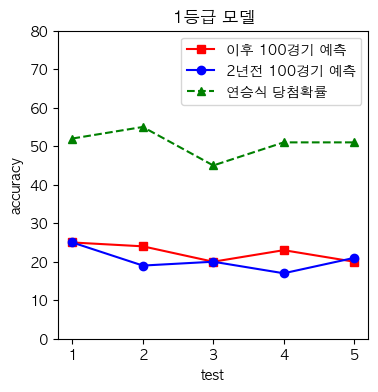

In [2]:
import matplotlib.pyplot as plt

result1 = [25, 24, 20, 23, 20]
result2 = [25, 19, 20, 17, 21]
result3 = [52, 55, 45, 51, 51]

plt.figure(figsize=(4, 4))

plt.plot(result1, "rs-", label="이후 100경기 예측")
plt.plot(result2, "bo-", label="2년전 100경기 예측")
plt.plot(result3, 'g^--', label="연승식 당첨확률")

plt.ylim(0, 80)
plt.xticks(range(5), labels=["1", "2", "3", "4", "5"])
plt.title("1등급 모델")
plt.xlabel("test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Model Performance Summary:
- Average accuracy of predicting the top horse in 100 games: 22.4%.
- Predicted accuracy for 100 games two years ago averaged 20.4%.
- The average probability of winning 100 consecutive games is 50.8%.

#### Model for Grade 2 horses

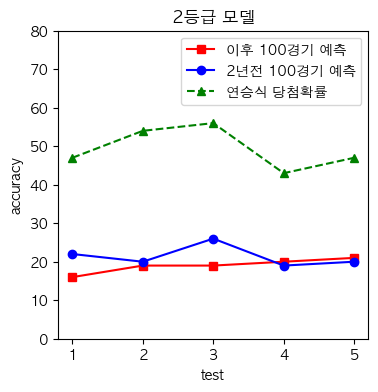

In [3]:
result1 = [16, 19, 19, 20, 21]
result2 = [22, 20, 26, 19, 20]
result3 = [47, 54, 56, 43, 47]

plt.figure(figsize=(4, 4))

plt.plot(result1, "rs-", label="이후 100경기 예측")
plt.plot(result2, "bo-", label="2년전 100경기 예측")
plt.plot(result3, 'g^--', label="연승식 당첨확률")

plt.ylim(0, 80)
plt.xticks(range(5), labels=["1", "2", "3", "4", "5"])
plt.title("2등급 모델")
plt.xlabel("test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Model Performance Summary:
- Average accuracy of predicting the top horse in 100 games: 19%.
- Predicted accuracy for 100 games two years ago averaged 21.5%.
- The average probability of winning 100 consecutive games is 49.4%.

#### Model for Grade 3 horses

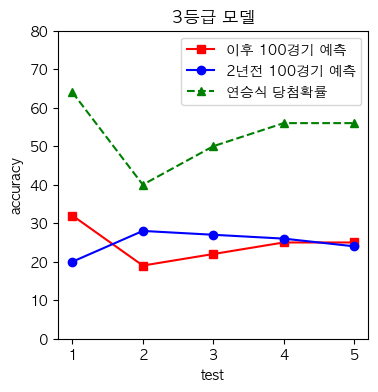

In [4]:
result1 = [32, 19, 22, 25, 25]
result2 = [20, 28, 27, 26, 24]
result3 = [64, 40, 50, 56, 56]

plt.figure(figsize=(4, 4))

plt.plot(result1, "rs-", label="이후 100경기 예측")
plt.plot(result2, "bo-", label="2년전 100경기 예측")
plt.plot(result3, 'g^--', label="연승식 당첨확률")

plt.ylim(0, 80)
plt.xticks(range(5), labels=["1", "2", "3", "4", "5"])
plt.title("3등급 모델")
plt.xlabel("test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Model Performance Summary:
- Average accuracy of predicting the top horse in 100 games: 24.6%.
- Predicted accuracy for 100 games two years ago averaged 25%.
- The average probability of winning 100 consecutive games is 53.2%.

#### Model for Grade 4 horses

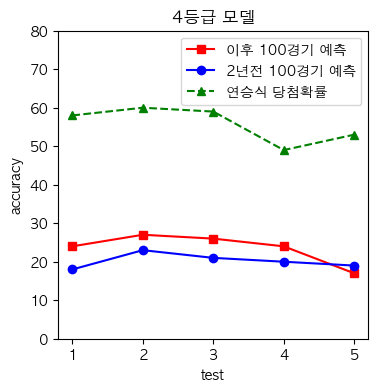

In [5]:
result1 = [24, 27, 26, 24, 17]
result2 = [18, 23, 21, 20, 19]
result3 = [58, 60, 59, 49, 53]

plt.figure(figsize=(4, 4))

plt.plot(result1, "rs-", label="이후 100경기 예측")
plt.plot(result2, "bo-", label="2년전 100경기 예측")
plt.plot(result3, 'g^--', label="연승식 당첨확률")

plt.ylim(0, 80)
plt.xticks(range(5), labels=["1", "2", "3", "4", "5"])
plt.title("4등급 모델")
plt.xlabel("test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Model Performance Summary:
- Average accuracy of predicting the top horse in 100 games: 23.6%.
- Predicted accuracy for 100 games two years ago averaged 20.2%.
- The average probability of winning 100 consecutive games is 55.8%.

#### Model for Grade 5 horses

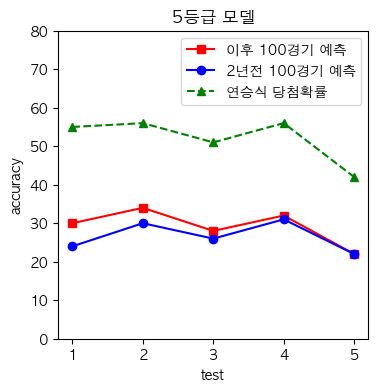

In [6]:
result1 = [30, 34, 28, 32, 22]
result2 = [24, 30, 26, 31, 22]
result3 = [55, 56, 51, 56, 42]

plt.figure(figsize=(4, 4))

plt.plot(result1, "rs-", label="이후 100경기 예측")
plt.plot(result2, "bo-", label="2년전 100경기 예측")
plt.plot(result3, 'g^--', label="연승식 당첨확률")

plt.ylim(0, 80)
plt.xticks(range(5), labels=["1", "2", "3", "4", "5"])
plt.title("5등급 모델")
plt.xlabel("test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Model Performance Summary:
- Average accuracy of predicting the top horse in 100 games: 29.2%.
- Predicted accuracy for 100 games two years ago averaged 26.6%.
- The average probability of winning 100 consecutive games is 52%.

#### Model for Grade 6 horses

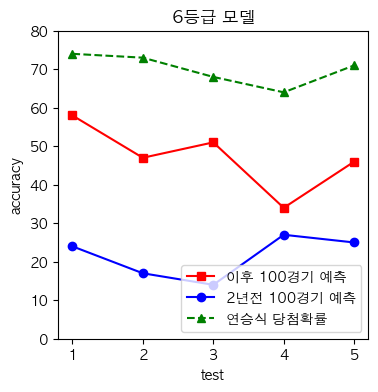

In [7]:
result1 = [58, 47, 51, 34, 46]
result2 = [24, 17, 14, 27, 25]
result3 = [74, 73, 68, 64, 71]

plt.figure(figsize=(4, 4))

plt.plot(result1, "rs-", label="이후 100경기 예측")
plt.plot(result2, "bo-", label="2년전 100경기 예측")
plt.plot(result3, 'g^--', label="연승식 당첨확률")

plt.ylim(0, 80)
plt.xticks(range(5), labels=["1", "2", "3", "4", "5"])
plt.title("6등급 모델")
plt.xlabel("test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Model Performance Summary:
- Average accuracy of predicting the top horse in 100 games: 47.2%.
- Predicted accuracy for 100 games two years ago averaged 21.4%.
- The average probability of winning 100 consecutive games is 70%.

### 평가 결과 분석

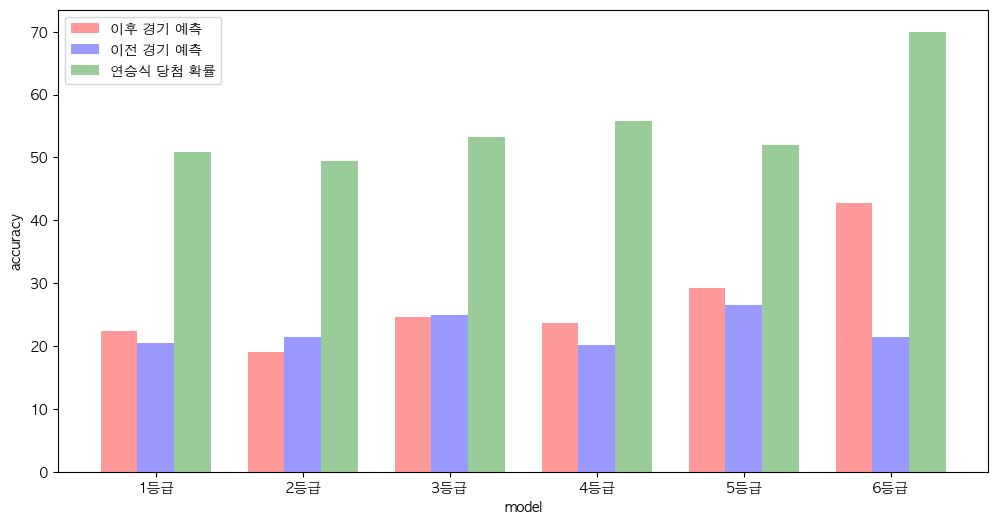

In [8]:
result1 = [22.4, 19.0, 24.6, 23.6, 29.2, 42.7]
result2 = [20.4, 21.5, 25.0, 20.2, 26.6, 21.4]
result3 = [50.8, 49.4, 53.2, 55.8, 52.0, 70.0]
index = np.arange(6)
labels = ["1등급", "2등급", "3등급", "4등급", "5등급", "6등급"]
bar_width = 0.25

plt.figure(figsize=(12,6))
plt.bar(index, result1, bar_width, alpha=0.4, color='red', label="이후 경기 예측")
plt.bar(index+bar_width, result2, bar_width, alpha=0.4, color='blue', label="이전 경기 예측")
plt.bar(index+2*bar_width, result3, bar_width, alpha=0.4, color='green', label="연승식 당첨 확률")

plt.xticks(np.arange(bar_width, 6+bar_width, 1), labels)
plt.xlabel("model")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Model Accuracy:
- Accuracy of predicting the top horse after training data:
  - 1st to 4th grade: Around 20%
  - 5th grade: Approached 30%
  - 6th grade: Rose to 47.2%

### Training Data Accuracy Insight:
- For races two years ago:
  - Generally lower accuracy, except for grades 2 and 3.
  - Indicates that training the model with records from one to two years just before the predicted race is more effective than using general data.

### Winning Streak Accuracy:
- For matches predicting one horse to be ranked third:
  - All models achieved over 50% accuracy.
  - Sixth-grade model demonstrated 70% accuracy.

### Model Analysis and Suggestions:
- The sixth-grade model outperforms others, likely due to focusing on external characteristics (gender, age, weight, past grades) since horses at this level may have fewer diverse attributes affecting their performance.
- Analysis of model criteria importance reveals that past grades of racehorses, jockeys, and assistant teachers are crucial. Starting number and age are significant for less-experienced horses.
- To enhance results, consider adding new independent variables like driving propensity, track suitability, weather suitability, and rider relationships for analysis.